This is an analysis of the script of the 1994 movie "Pulp Fiction" directed by Quentin Tarantino.

The analysis primarily focuses on the words in the final draft of the script available [here](http://www.godamongdirectors.com/scripts/pulp.shtml).

Prior preprocessing was performed to remove non-essential parts of the data i.e the FADE INS, Actions, transitions etc.

Imports

In [1]:
import pandas as pd
import string
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

Load the data i.e the script

In [2]:
# Load the data
lines = open('pulp fiction', encoding='utf-8', errors='ignore').read()

Data Cleaning and Preprocessing

In [3]:
data = []

parts = lines.split('\n\n')
for part in parts:
    person, lines = part.split('\n', 1)
    person = person.strip()
    lines = "\n".join(x.strip() for x in lines.split('\n'))
    data.append([person, lines])

import pandas as pd

df = pd.DataFrame(data)
df.columns = ['person', 'lines']

df.head(10)

,person,lines
0,YOUNG MAN,"No, forget it, it's too risky. I'm\nthrough d..."
1,YOUNG WOMAN,"You always say that, the same thing\nevery tim..."
2,YOUNG MAN,I know that's what I always say.\nI'm always r...
3,YOUNG WOMAN,-- but you forget about it in a day\nor two --
4,YOUNG MAN,"-- yeah, well, the days of me\nforgittin' are ..."
5,YOUNG WOMAN,"When you go on like this, you know\nwhat you s..."
6,YOUNG MAN,"I sound like a sensible fucking\nman, is what ..."
7,YOUNG WOMAN,"You sound like a duck.\nQuack, quack, quack, q..."
8,YOUNG MAN,"Well take heart, 'cause you're\nnever gonna ha..."
9,YOUNG WOMAN,After tonight.


In [4]:
df['lines'] = df['lines'].apply(lambda x: re.sub('\n', ' ', x))

In [5]:
df.head()

,person,lines
0,YOUNG MAN,"No, forget it, it's too risky. I'm through do..."
1,YOUNG WOMAN,"You always say that, the same thing every time..."
2,YOUNG MAN,I know that's what I always say. I'm always ri...
3,YOUNG WOMAN,-- but you forget about it in a day or two --
4,YOUNG MAN,"-- yeah, well, the days of me forgittin' are o..."


Begin Line Analysis

In [6]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
lines_bow = vectorizer.fit_transform(df['lines'])

In [7]:
print("Number of lines: ", df.shape[0])
print("Number of unique words: ", lines_bow.shape[1])

Number of lines:  1286
Number of unique words:  3596


Create a new column for the length of each line (in words)

In [8]:
df['line_length'] = df.lines.apply(lambda x: len(set(x.split())))

Check who says the most lines

In [9]:
line_count = df.groupby(['person'])['lines'].count().reset_index().sort_values(by = 'lines', ascending=False).reset_index().drop('index', axis=1)
line_count

,person,lines
0,VINCENT,280
1,JULES,233
2,BUTCH,144
3,FABIAN,92
4,MIA,82
5,THE WOLF,52
6,LANCE,49
7,JIMMIE,36
8,PUMPKIN,34
9,YOUNG MAN,27


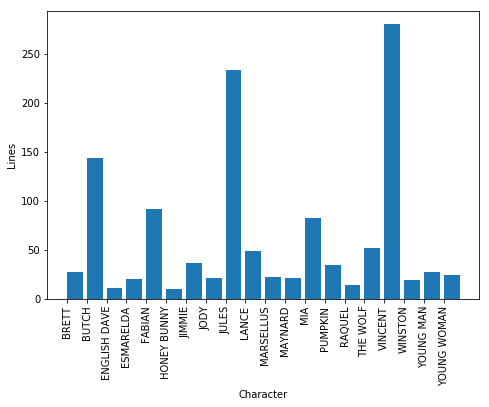

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
person = line_count.person.head(20)
lines = line_count.lines.head(20)
ax.bar(person,lines, align ='edge')
ax.set_ylabel('Lines')
ax.set_xlabel('Character')
plt.xticks(rotation=90)
plt.show()

In [11]:
df.head(20)

,person,lines,line_length
0,YOUNG MAN,"No, forget it, it's too risky. I'm through do...",11
1,YOUNG WOMAN,"You always say that, the same thing every time...",15
2,YOUNG MAN,I know that's what I always say. I'm always ri...,11
3,YOUNG WOMAN,-- but you forget about it in a day or two --,11
4,YOUNG MAN,"-- yeah, well, the days of me forgittin' are o...",15
5,YOUNG WOMAN,"When you go on like this, you know what you so...",10
6,YOUNG MAN,"I sound like a sensible fucking man, is what I...",10
7,YOUNG WOMAN,"You sound like a duck. Quack, quack, quack, qu...",8
8,YOUNG MAN,"Well take heart, 'cause you're never gonna haf...",20
9,YOUNG WOMAN,After tonight.,2


Now let's create a column for a preprocessed version of each line.
We'll lower, stem, remove punctuation from and tokenize each line

In [12]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def process_lines(x):
    new_line = ''
    lowered = x.lower()
    stemmed = stemmer.stem(lowered)
    depunctuated = stemmed.translate(str.maketrans('', '', string.punctuation))
    #Let's actually not lametize today
    tokens = word_tokenize(depunctuated)
    line_word_list = [i for i in tokens if not i in stop_words]
    #result = ''.join(line_word_list)
    for word in line_word_list:  
        new_line += word + ' '
    return new_line

In [13]:
process_lines(df.lines[0])

'forget risky im doin shit '

In [14]:
df['edited_lines'] = df.lines.apply(lambda x: process_lines(x))

In [15]:
df.head()

,person,lines,line_length,edited_lines
0,YOUNG MAN,"No, forget it, it's too risky. I'm through do...",11,forget risky im doin shit
1,YOUNG WOMAN,"You always say that, the same thing every time...",15,always say thing every time never im dangerous
2,YOUNG MAN,I know that's what I always say. I'm always ri...,11,know thats always say im always right
3,YOUNG WOMAN,-- but you forget about it in a day or two --,11,forget day two
4,YOUNG MAN,"-- yeah, well, the days of me forgittin' are o...",15,yeah well days forgittin days rememberin begun


Vectorize the preproccesed lines 

In [16]:
edited_lines_bow = vectorizer.fit_transform(df['edited_lines'])

In [17]:
print("Number of unique words in original: ", lines_bow.shape[1])
print("Number of unique words in preprocessed lines: ", edited_lines_bow.shape[1])

Number of unique words in original:  3596
Number of unique words in preprocessed lines:  2306


In [18]:
words = vectorizer.get_feature_names()
print("Few words: ", words[:20])

Few words:  ['100', '1030', '1974', '22year', '2517', '357', '45', '7000', '818', '930', 'ability', 'able', 'absolutely', 'abuse', 'abusive', 'accentuate', 'accepted', 'accident', 'accidentally', 'according']


In [19]:
freq = edited_lines_bow.sum(axis=0).A1
word_to_count_map = dict(zip(words, freq))

list = []
for key, value in word_to_count_map.items():
    list.append([key, value])
    
words_df = pd.DataFrame(list, columns=['words', 'Counts']).sort_values(by='Counts', ascending= False).reset_index().drop('index', axis=1)
words_df.head()

,words,Counts
0,im,147
1,dont,146
2,na,121
3,fuckin,98
4,got,93


Let's look at a word cloud because we're fancy like that

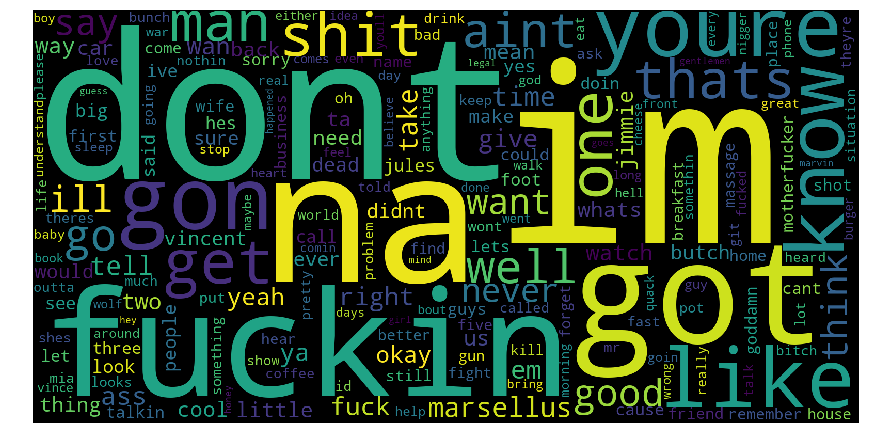

In [20]:
word_cloud_2 = WordCloud(width=1600,height=800,).generate_from_frequencies(word_to_count_map)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud_2)
plt.axis('off')
plt.tight_layout(pad=0)

### Royal with cheese anyone?

What are the entities, products and companies named in the movie?

We'll use SpaCy for POS tags and NER since nltk doesn't so so well in this area

In [21]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Create a string with all the de-duplicated and preprocessed words in the script

In [22]:
word_string = ''
for word in words:
    word_string += (word + ' ')

In [23]:
len(word_string)

16389

In [24]:
script_words = nlp(word_string)
print('There are ', len(script_words.ents) , 'entities in the script')

There are  183 entities in the script


In [25]:
labels = [x.label_ for x in script_words.ents]
Counter(labels)

Counter({'CARDINAL': 18,
         'DATE': 10,
         'FAC': 2,
         'GPE': 15,
         'LANGUAGE': 1,
         'LOC': 2,
         'NORP': 17,
         'ORDINAL': 1,
         'ORG': 30,
         'PERSON': 79,
         'PRODUCT': 4,
         'TIME': 3,
         'WORK_OF_ART': 1})

## Let's examine the great line(s) from Captain Koons regarding Butch's watch

![title](koons.jpg)

In [26]:
koons_line = df[df.person == "CAPT. KOONS"]['lines'].values[1]
koons_line[:160]

'This watch I got here was first purchased by your great-granddaddy. It was bought during the First World War in a little general store in Knoxville, Tennessee. '

In [27]:
koons_nlp = nlp(koons_line)
print('There are ', len(koons_nlp.ents) , 'entities in koons speech')

There are  27 entities in koons speech


In [28]:
pprint([(X.text, X.label_) for X in koons_nlp.ents])

Pretty printing has been turned OFF


In [29]:
sentence = [x for x in koons_nlp.sents]

displacy.render(nlp(str(sentence)), jupyter=True, style='ent')

![title](spacy_reference.png)

In [30]:
displacy.render(nlp(str(sentence[:3])), style='dep', jupyter = True, options = {'distance': 120})

Part of Speech (POS) extraction and lammetization for each word in the line 

In [36]:
'''[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentence)) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]
                                      '''

"[(x.orth_,x.pos_, x.lemma_) for x in [y \n                                      for y\n                                      in nlp(str(sentence)) \n                                      if not y.is_stop and y.pos_ != 'PUNCT']]\n                                      "

In [32]:
 Counter([x.label_ for x in koons_nlp.ents])

Counter({'DATE': 7, 'GPE': 4, 'NORP': 4, 'ORG': 4, 'PERSON': 3, 'EVENT': 2, 'ORDINAL': 1, 'LOC': 1, 'CARDINAL': 1})

Topic Modelling

In [33]:
#words = tf_vectorizer.get_feature_names()

In [38]:
# Using Latent Dirichlet Allocation Model Algorithm to find 15 Topics in text
from sklearn.decomposition import NMF, LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=8, max_iter=500, 
                                learning_method='online', learning_offset=50.,random_state=0)
lda_model.fit(edited_lines_bow)
lda_W = lda_model.transform(edited_lines_bow)
lda_H = lda_model.components_

C:\Users\Gafa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [39]:
no_top_words = 5
topic_summaries=[]
def LDA_display(topic_matrix,feature_names, no_top_words):
    """ This function prints the different topic numbers with the 
    four most common words in every topic"""
    for topic_idx, topic in enumerate(topic_matrix):
        print ("Topic {}".format(topic_idx))
        x= (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print(x)
        topic_summaries.append(x)

In [40]:
LDA_display(lda_H,words,no_top_words)

Topic 0
pot belly pretty normal jesus
Topic 1
dont na fuckin gon think
Topic 2
im man ass youre evil
Topic 3
okay one need car aint
Topic 4
im whats time regularly foot
Topic 5
sure quack right handle feel
Topic 6
well get yeah like one
Topic 7
got fuck watch want dont


In [43]:
from PIL import Image
import pyLDAvis 
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import pyLDAvis

pyLDAvis.sklearn.prepare(lda_model, edited_lines_bow, vectorizer,mds='tsne')

PreparedData(topic_coordinates=            Freq  cluster  topics           x          y
topic                                                   
1      30.518282        1       1  -10.668528 -53.642014
2      17.787213        1       2  -80.354683 -54.376057
7      15.308537        1       3   32.204388   1.299675
6      11.481047        1       4  -47.123360  98.649178
4       9.140649        1       5 -124.379898  -0.353460
3       8.536803        1       6 -109.588318  67.748909
5       4.018567        1       7  -46.275700  18.343306
0       3.208901        1       8   15.980515  69.075035, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
1012  Default  131.000000            im  131.000000  30.0000  30.0000
852   Default   73.000000           gon   73.000000  29.0000  29.0000
1352  Default   90.000000            na   90.000000  28.0000  28.0000
789   Default   80.000000        fuckin   80.000000  27.0000  27.0000
2205  Default   43.000000          well   43.000000  26.0000  26.0000
1416  Default   22.000000          okay   22.000000  25.0000  25.0000
861   Default   60.000000           got   60.000000  24.0000  24.0000
1420  Default   56.000000           one   56.000000  23.0000  23.0000
88    Default   46.000000           ass   46.000000  22.0000  22.0000
1233  Default   64.000000           man   64.000000  21.0000  21.0000
785   Default   27.000000          fuck   27.000000  20.0000  20.0000
639   Default   30.000000          evil   30.000000  19.0000  19.0000
1680  Default   29.000000     righteous   29.000000  18.0000  18.0000
814   Default   55.000000           get   55.000000  17.0000  17.0000
537   Default  118.000000          dont  118.000000  16.0000  16.0000
1948  Default   13.000000          sure   13.000000  15.0000  15.0000
2282  Default   24.000000          yeah   24.000000  14.0000  14.0000
2038  Default   24.000000          time   24.000000  13.0000  13.0000
2182  Default   23.000000         watch   23.000000  12.0000  12.0000
2219  Default   19.000000         whats   19.000000  11.0000  11.0000
2297  Default   70.000000         youre   70.000000  10.0000  10.0000
1007  Default   32.000000           ill   32.000000   9.0000   9.0000
1360  Default   19.000000          need   19.000000   8.0000   8.0000
1651  Default   15.000000     regularly   15.000000   7.0000   7.0000
37    Default   49.000000          aint   49.000000   6.0000   6.0000
2017  Default   54.000000         think   54.000000   5.0000   5.0000
1782  Default   68.000000          shit   68.000000   4.0000   4.0000
1776  Default   22.000000      shepherd   22.000000   3.0000   3.0000
1180  Default   65.000000          like   65.000000   2.0000   2.0000
1679  Default   25.000000         right   25.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
628    Topic8    1.162029          esta    1.808536   2.9969  -5.4668
154    Topic8    1.160743       bellies    1.807226   2.9965  -5.4680
1767   Topic8    1.160743          sexy    1.807226   2.9965  -5.4680
1290   Topic8    1.160727       mexican    1.807234   2.9965  -5.4680
1298   Topic8    1.155524          milk    1.802045   2.9949  -5.4725
1835   Topic8    1.653181         smart    3.045335   2.8283  -5.1143
2169   Topic8    1.672567       wallets    3.191382   2.7931  -5.1027
2239   Topic8    0.623471           win    1.269954   2.7278  -6.0895
1939   Topic8    0.623456    successful    1.269961   2.7278  -6.0895
1727   Topic8    0.623456         score    1.269961   2.7278  -6.0895
1647   Topic8    0.622158       redondo    1.268641   2.7267  -6.0916
129    Topic8    0.622158         beach    1.268641   2.7267  -6.0916
41     Topic8    0.620848      almighty    1.267330   2.7257  -6.0937
0      Topic8    0.620848           100    1.267330   2.7257  -6.0937
501    Topic8    0.619540  diediediedie    1.266023   2.7246  -6.0958
5      Topic8    0.619540  